#Montamos la unidad de drive, para acceder al dataset

In [1]:
# prompt: include
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

#Ubicación del archivo
archivo = '/content/drive/MyDrive/DataScience/phishing_clean.csv'

Mounted at /content/drive


#1. Matriz de correlación

In [4]:
import pandas as pd
#Carga del dataset
datos_analisis = pd.read_csv(archivo)

In [2]:
#librerías requeridas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [7]:
#convertimos el valor de la categoría status a númerico
#para poder realizar análisis cuando tengamos el modelo
# status = 1 : phishing
# status = 0 : legitimate
datos_analisis['Phishing'] = datos_analisis['Status'].map({'Phishing': 1, 'Legitimo': 0})

In [8]:
# Las características númericas se normalizan, para evaluar la correlación
scaler = StandardScaler()
numeric_features = datos_analisis.select_dtypes(include=[np.number])
datos_analisis[numeric_features.columns.values] = scaler.fit_transform(datos_analisis[numeric_features.columns.values])

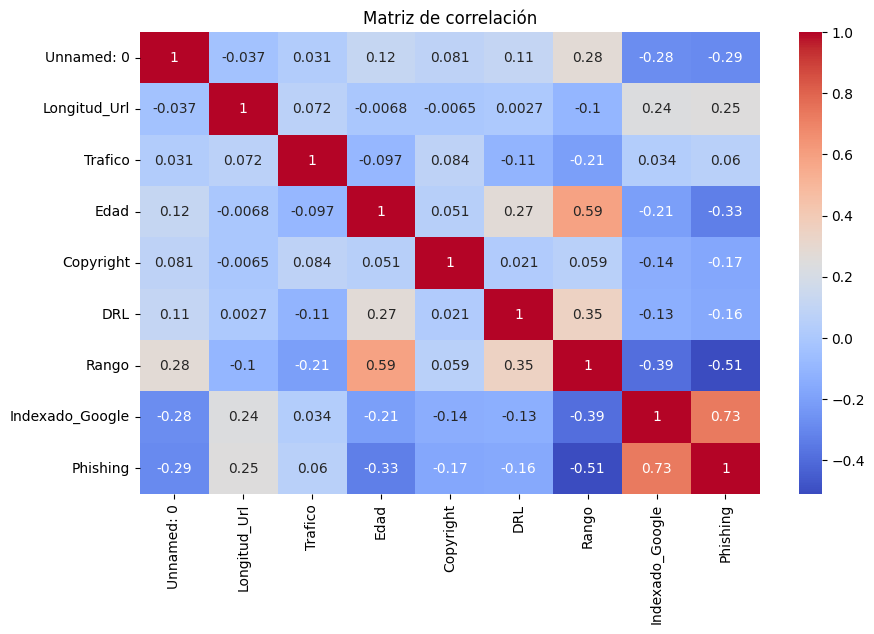

In [9]:
#Se procede a generar la matriz de correlación

#Establecemos el tamaño
plt.figure(figsize=(10, 6))
#Obtenemos las características numéricas sobre las que
#evaluaremos la correlación
numeric_features = datos_analisis.select_dtypes(include=[np.number])
#Generamos la matriz de correlación
correlation_matrix = datos_analisis[numeric_features.columns.values].corr()
#Generamos un mapa de calos, para visualizar la correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

#Curva ROC

In [10]:
#librerías a utilizar
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [11]:
# Cargar el dataset
df = pd.read_csv(archivo)

In [12]:
#convertimos el valor de la categoría status a númerico
#para poder realizar análisis cuando tengamos el modelo
# status = 1 : phishing
# status = 0 : legitimate
df['Status'] = df['Status'].map({'Phishing': 1, 'Legitimo': 0})

In [13]:
# Separar características y variable objetivo
#X = df[['URL', 'Longitud_Url', 'Trafico', 'Edad', 'Copyright', 'DRL', 'Rango', 'Indexado_Google']]
X = df[['Longitud_Url', 'Trafico', 'Edad', 'Copyright', 'DRL', 'Rango', 'Indexado_Google']]
y = df['Status']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Entrenar un modelo de clasificación, por ejemplo, Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Predecir probabilidades
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

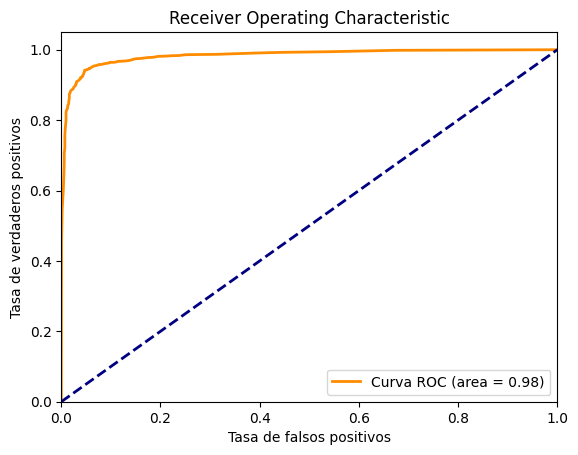

In [16]:
# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Agrupación por clústeres

In [17]:
#librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

import plotly.express as px
import os as os

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer

In [18]:
#EDA
#se carga el dataset
datos_df = pd.read_csv(archivo)

In [19]:
#copiamos el df
data = datos_df.copy()

#Seleccionamos las variables
data.drop("URL",axis=1,inplace=True)

In [ ]:
df.columns

Index(['Unnamed: 0', 'URL', 'Longitud_Url', 'Trafico', 'Edad', 'Copyright',
       'DRL', 'Rango', 'Indexado_Google', 'Status'],
      dtype='object')

In [21]:
#modelo K-Means
d = pd.DataFrame(data[['Longitud_Url','Trafico','Edad','Copyright','Rango']])
d1 = preprocessing.normalize(d)

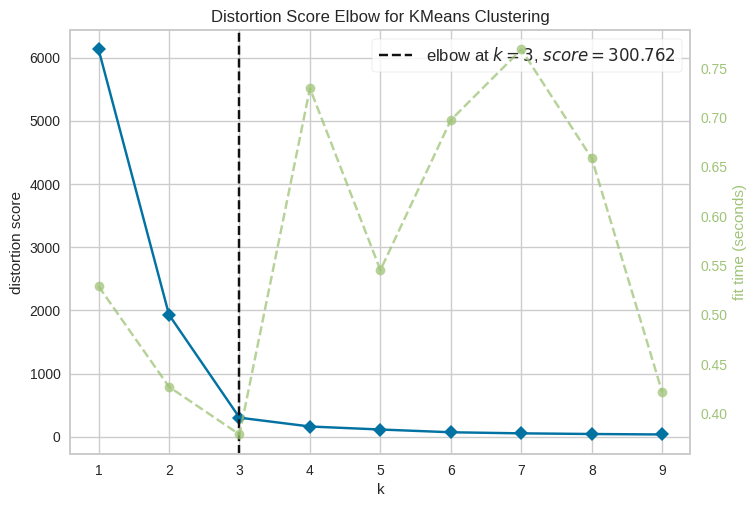

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10))
visualizer.fit(d1)
visualizer.show()

In [23]:
kmedia_3 = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=111,algorithm='elkan')
kmedia_3.fit(d1)
labels_3 = kmedia_3.labels_
centroids_3 = kmedia_3.cluster_centers_
data['cluster_3'] = labels_3

In [24]:
#gráfico 3d interactivo
fig = px.scatter_3d(data,x='Status',y='DRL',z='Longitud_Url',color='cluster_3',height=800,width=800)
fig.write_html('/content/drive/MyDrive/DataScience/cluster_4k.html')
fig.show()

#2. Algoritmos de Machine Learning

#2.1 Regresión logística

In [25]:
pip install pandas scikit-learn plotly

In [26]:
#Librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import plotly.express as px

In [27]:
# 1. Carga del archivo
df = pd.read_csv(archivo)

In [28]:
# Separar características y variable objetivo
X = df[['Longitud_Url', 'Trafico', 'Edad', 'Copyright', 'DRL', 'Rango', 'Indexado_Google']]
y = df['Status']

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1234)

In [29]:
# Entrenar un modelo de regresión logística
logreg = LogisticRegression(random_state=1234)
logreg.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = logreg.predict(X_test)

# Evaluar el desempeño del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

print("Precisión:", accuracy_score(y_test, y_pred))

Matriz de confusión:
[[1493  206]
 [ 223 1507]]

Informe de clasificación:
              precision    recall  f1-score   support

    Legitimo       0.87      0.88      0.87      1699
    Phishing       0.88      0.87      0.88      1730

    accuracy                           0.87      3429
   macro avg       0.87      0.87      0.87      3429
weighted avg       0.87      0.87      0.87      3429

Precisión: 0.8748906386701663


#Aplicamos un balanceo a las clases, para mejorar la precisión de la Regresión Logística

In [30]:
#Librerías a utilizar

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE #Para aplicar el balanceo

In [31]:
# Cargar el dataset
df = pd.read_csv(archivo)

In [32]:
# Seleccionar características y objetivo
X = df[['Longitud_Url', 'Trafico', 'Edad', 'Copyright', 'DRL', 'Rango', 'Indexado_Google']]
y = df['Status']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:


# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Entrenar el modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train_res, y_train_res)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Precisión:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Informe de clasificación:\n", classification_report(y_test, y_pred))


Precisión: 0.8690580344123651
Matriz de Confusión:
 [[1479  236]
 [ 213 1501]]
Informe de clasificación:
               precision    recall  f1-score   support

    Legitimo       0.87      0.86      0.87      1715
    Phishing       0.86      0.88      0.87      1714

    accuracy                           0.87      3429
   macro avg       0.87      0.87      0.87      3429
weighted avg       0.87      0.87      0.87      3429



#2.2. Árbol de decisión

Librerías a utilizar

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

Carga del dataset

In [35]:
# Cargar el dataset
df = pd.read_csv(archivo)

Preparación de los datos

In [36]:
# Separar características y variable objetivo
X = df[['Longitud_Url', 'Trafico', 'Edad', 'Copyright', 'DRL', 'Rango', 'Indexado_Google']]
#X = df[['Longitud_Url', 'Trafico', 'Edad','DRL', 'Indexado_Google']]
y = df['Status']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Entrenamiento del modelo de árbol de decisión

In [37]:
# Entrenar un modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Evaluación del modelo

In [38]:
# Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar el desempeño del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

print("Precisión:", accuracy_score(y_test, y_pred))

Matriz de confusión:
[[1543  126]
 [ 176 1584]]

Informe de clasificación:
              precision    recall  f1-score   support

    Legitimo       0.90      0.92      0.91      1669
    Phishing       0.93      0.90      0.91      1760

    accuracy                           0.91      3429
   macro avg       0.91      0.91      0.91      3429
weighted avg       0.91      0.91      0.91      3429

Precisión: 0.9119276757072032


Visualización del árbol de decisión

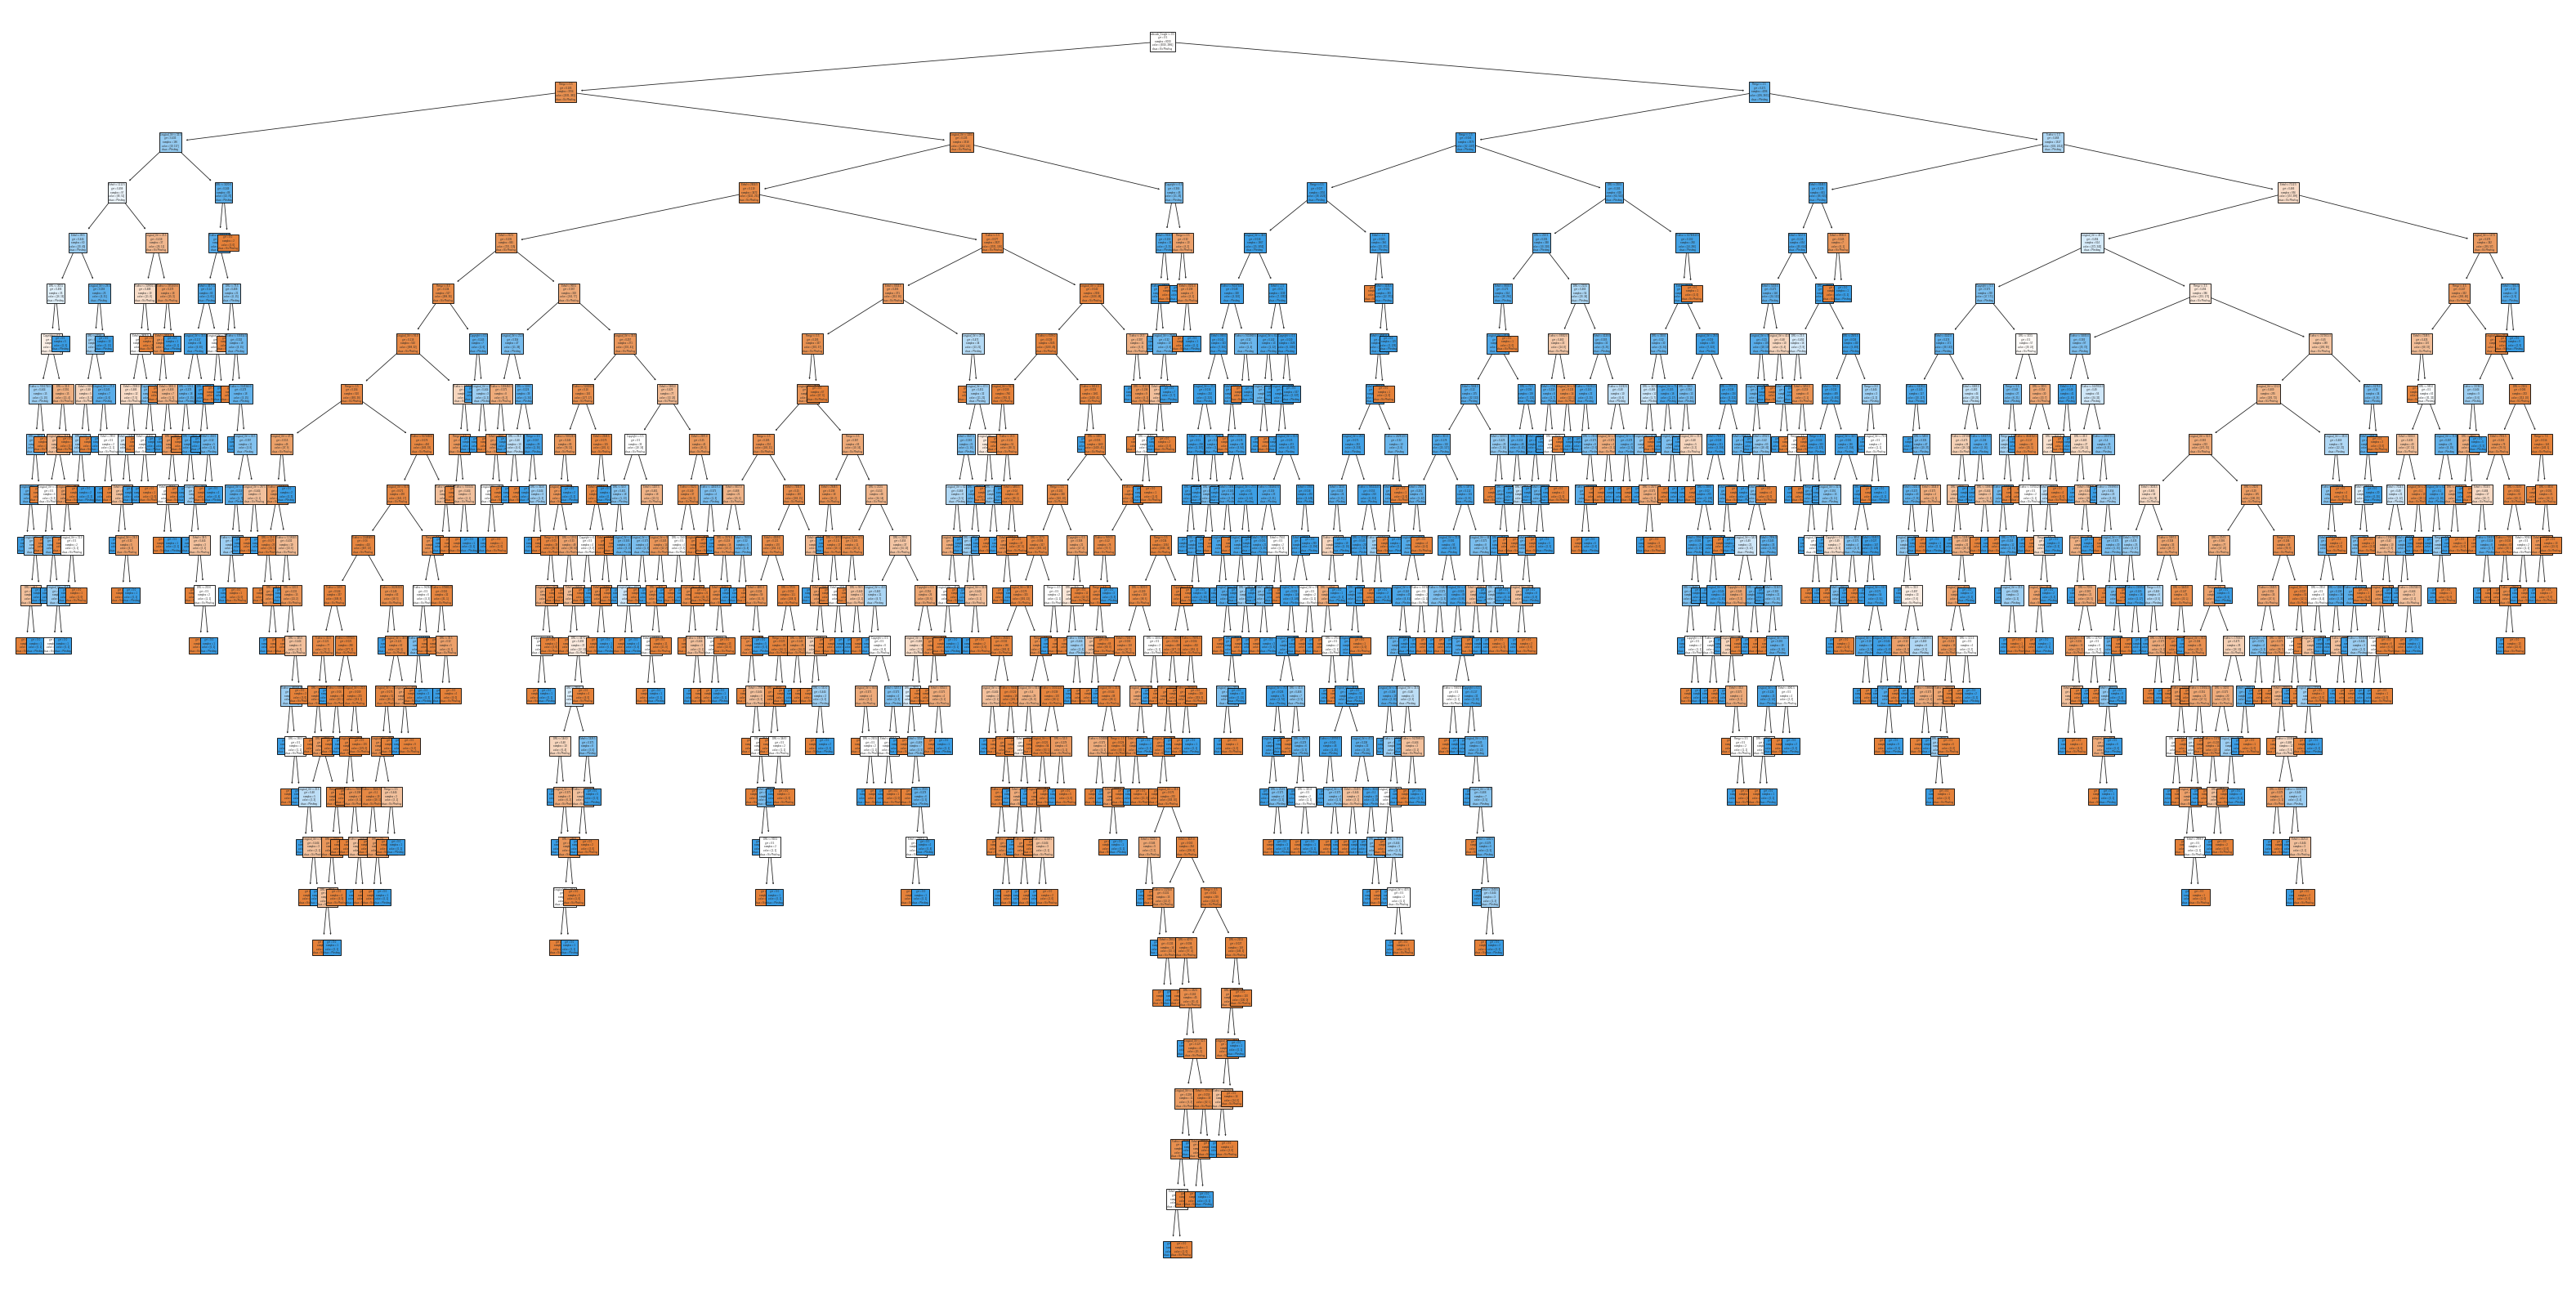

In [57]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=['Longitud_Url', 'Trafico', 'Edad', 'Copyright', 'DRL', 'Rango', 'Indexado_Google'], class_names=['No Phishing', 'Phishing'])
plt.orientation = 'LR'
plt.show()

Árbol interactivo

In [40]:
import sys
import os

In [41]:
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg'
%matplotlib inline

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.2 MB/s eta 0:00:00


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import dtreeviz
import matplotlib.pyplot as plt

In [43]:
# Separar características y variable objetivo
X = df[['Longitud_Url', 'Trafico', 'Edad', 'Copyright', 'DRL', 'Rango', 'Indexado_Google']]
y = df['Status']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [44]:
# Entrenar un modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
#convertimos el valor de la categoría status a númerico
#para poder realizar análisis cuando tengamos el modelo
# status = 1 : phishing
# status = 0 : legitimate
df['Estado'] = df['Status'].map({'Phishing': 1, 'Legitimo': 0})

# Si hay variables categóricas, codificarlas (si no lo están ya)
# Asumiremos que 'Status' es la variable objetivo y es categórica (0 para benigno y 1 para phishing)
# Si es necesario, convierte 'Status' en numérico
df['Estado'] = df['Estado'].astype(int)

In [46]:
features = ["Longitud_Url", "Trafico", "Edad", "Copyright", "DRL", "Rango", "Indexado_Google"]
target = "Estado"

tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_classifier.fit(df[features].values, df[target].values)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [47]:
viz_model = dtreeviz.model(tree_classifier,
                           X_train=df[features], y_train=df[target],
                           feature_names=features,
                           target_name=target, class_names=["No phishing", "Phishing"])

In [48]:
# Crear una visualización interactiva del árbol de decisión
viz = dtreeviz.model(clf,
               X_train,
               y_train,
               target_name='Estado',
               feature_names=['Longitud_Url', 'Trafico', 'Edad', 'Copyright', 'DRL', 'Rango', 'Indexado_Google'],
               class_names=['No Phishing', 'Phishing'])


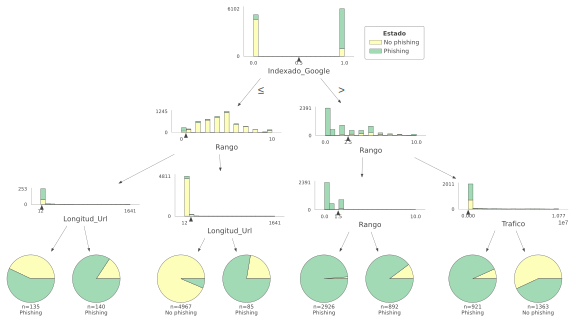

In [49]:
viz_model.view(scale=0.8)

In [ ]:
viz_model.view(orientation="LR")

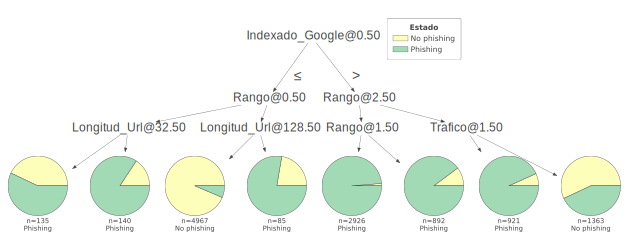

In [56]:
viz_model.view(fancy=False)

#Random Forest

In [50]:
#Librerías a utilizar
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
# Cargar el dataset
dataset = pd.read_csv(archivo)

In [52]:
# Seleccionar características y objetivo
X = df[['Longitud_Url', 'Trafico', 'Edad', 'Copyright', 'DRL', 'Rango', 'Indexado_Google']]
y = df['Status']

In [53]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
# Entrenar el modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Precisión:", accuracy_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Informe de clasificación:\n", classification_report(y_test, y_pred))

Precisión: 0.9448818897637795
Matriz de confusión:
 [[1086   57]
 [  69 1074]]
Informe de clasificación:
               precision    recall  f1-score   support

    Legitimo       0.94      0.95      0.95      1143
    Phishing       0.95      0.94      0.94      1143

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286



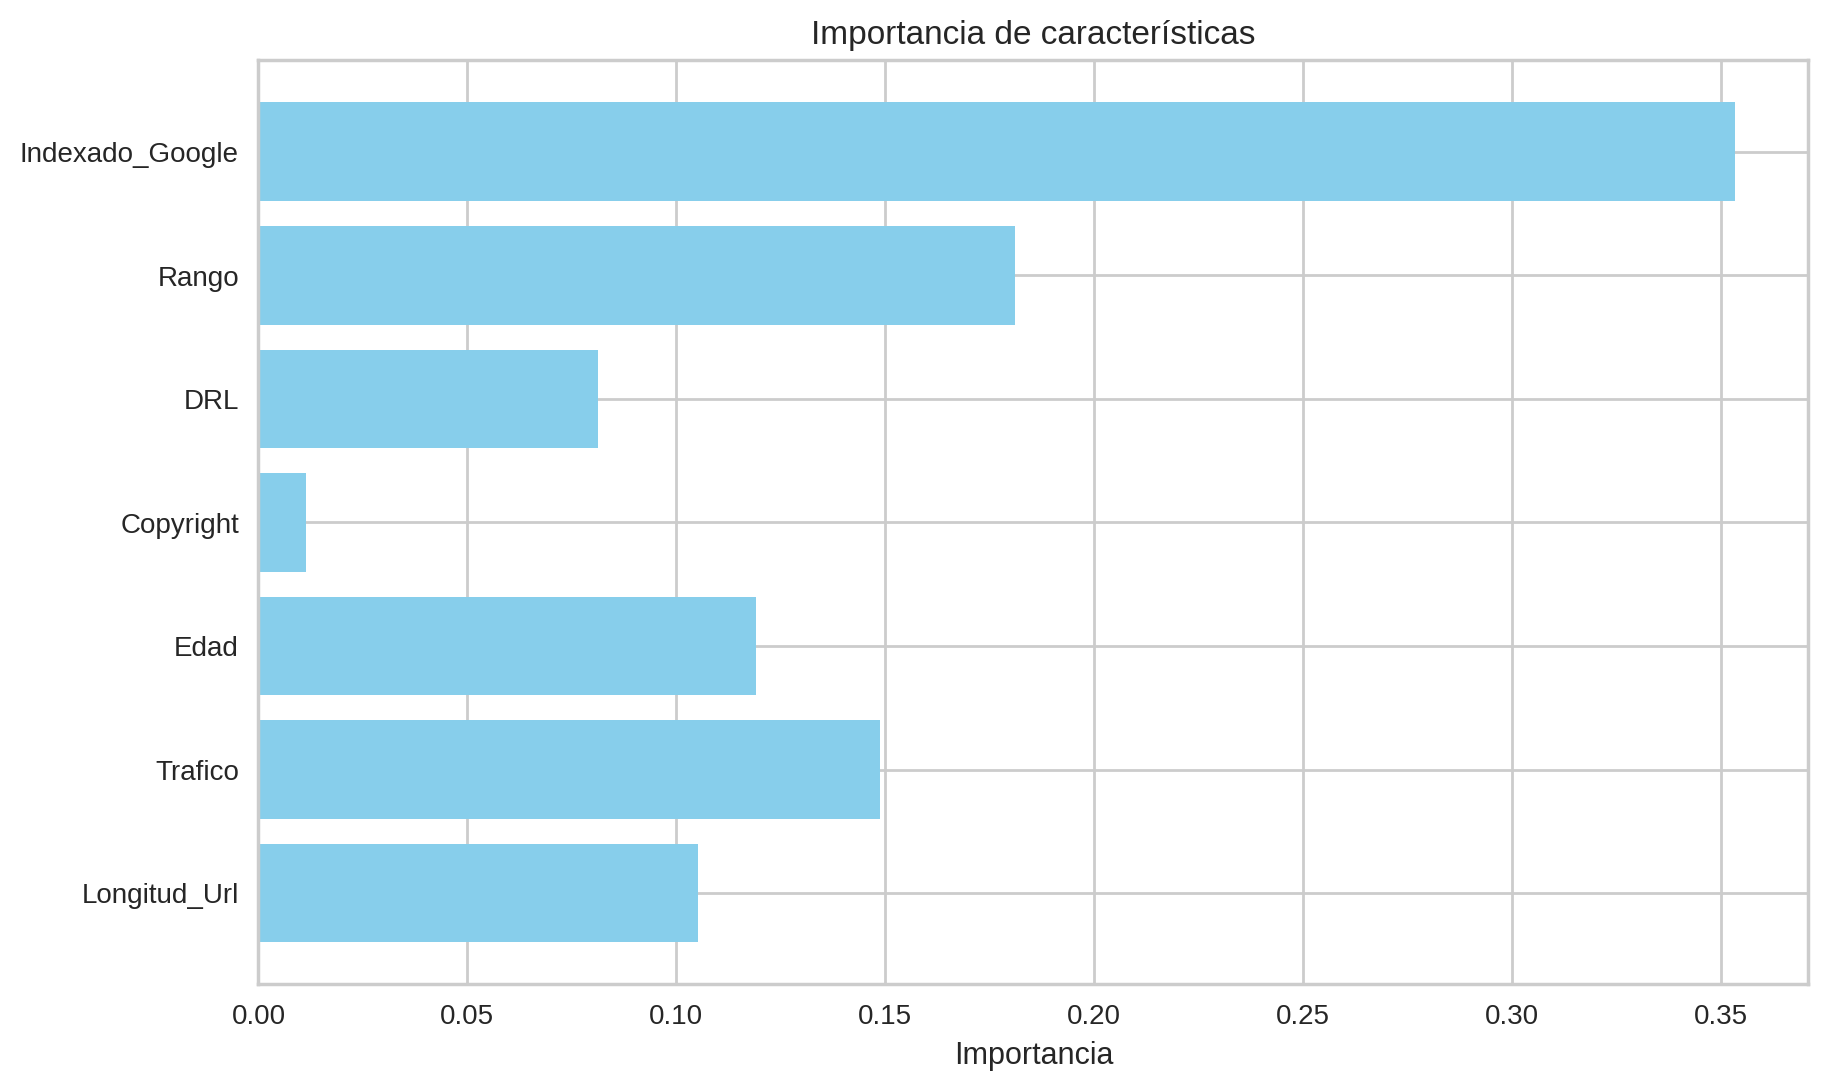

In [55]:
import matplotlib.pyplot as plt

# Obtener la importancia de las características
feature_importances = model.feature_importances_
features = ['Longitud_Url', 'Trafico', 'Edad', 'Copyright', 'DRL', 'Rango', 'Indexado_Google']

# Crear un gráfico de barras para mostrar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de características')
plt.show()